## Import packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


`pandas`: Used for data manipulation and analysis.  
`numpy`: For numerical computations and array manipulation.  
`re`: For regular expression operations, although not explicitly used in this code snippet.  
`matplotlib.pyplot`: Provides a MATLAB-like plotting interface for creating visualizations.  
`seaborn`: Enhances the aesthetics and visual appeal of matplotlib plots.  
`sklearn.model_selection.train_test_split`: Splits data into random train and test subsets.  
`sklearn.preprocessing.StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.  
`sklearn.preprocessing.LabelEncoder`: Encodes target labels with values between 0 and n_classes-1.  
`sklearn.linear_model.LogisticRegression`: Implements logistic regression for classification tasks.  
`sklearn.metrics`: Contains various metrics for evaluating model performance.  
`sklearn.tree.DecisionTreeClassifier`: Implements a decision tree classifier.  

## Loading the dataset

In [2]:
movies_df =  pd.read_csv("movies.csv")
movies_df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


`pd.read_csv`: Reads a CSV file into a DataFrame.  
`movies_df.head(10)`: Displays the first 10 rows of the DataFrame movies_df.  

This code reads a CSV file named "movies.csv" into a DataFrame called movies_df and displays the first 10 rows of the DataFrame.

## Column Datatypes

In [3]:
movies_df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

`movies_df.dtypes`: Returns the data types of each column in the DataFrame `movies_df`.

## Rows and Columns of the dataframe

In [4]:
movies_df.shape

(9999, 9)

`movies_df.shape`: Returns the shape of the DataFrame `movies_df`.  

This code returns a tuple representing the dimensions of the DataFrame movies_df, where the first element is the number of rows and the second element is the number of columns.

## Column Names

In [5]:
#Rename column names
df_columns = movies_df.columns.tolist()
for c in df_columns:
    movies_df = movies_df.rename(columns=({c: movies_df[c].name.title()}))

movies_df = movies_df.rename(columns=({'Gross': 'Gross (in million $)'}))

`movies_df.columns.tolist()`: Extracts the column names of the DataFrame movies_df and converts them to a list.  
`for c in df_columns`: Iterates through each column name.  
`movies_df = movies_df.rename(columns={c: movies_df[c].name.title()})`: Renames each column to title case using the .title() method.  
`movies_df = movies_df.rename(columns={'Gross': 'Gross (in million $)'})`: Renames the 'Gross' column to 'Gross (in million $)'.  

In [6]:
for col in movies_df.select_dtypes(include=['object']).columns:
    movies_df[col] = movies_df[col].str.replace('\n', ' ')

`movies_df.select_dtypes(include=['object']).columns`: Selects columns with object data type.  
`for col in ...`: Iterates through each selected column.  
`movies_df[col] = movies_df[col].str.replace('\n', ' ')`: Replaces newline characters (\n) with spaces in the values of the selected column.

## Drop the duplicate rows
### Shows rows and columns after the removal of duplicate rows.

In [7]:
#Drop duplicates
movies_df = movies_df.drop_duplicates()
movies_df.shape

(9568, 9)

## Formating the Columns

In [8]:
# Clean and preprocess columns

# Movies: Remove leading and trailing whitespaces
movies_df['Movies'] = movies_df['Movies'].str.strip()

# Votes: Fill missing values with '0', remove commas, and convert to integer
movies_df['Votes'] = movies_df['Votes'].fillna('0').str.replace(',', '').astype(int)

# Rating: Fill missing values with 0.0
movies_df['Rating'] = movies_df['Rating'].fillna(0.0)

# Gross: Remove 'M' and '$', convert to float, and fill missing values with 0.0
movies_df['Gross (in million $)'] = movies_df['Gross (in million $)'].str.replace('M', '').str.replace('$', '').astype(float).fillna(0.0)

# Runtime: Fill missing values with 0.0
movies_df['Runtime'] = movies_df['Runtime'].fillna(0.0)

# Year: Clean year values and split into Start_Year and End_Year
movies_df['Year'] = movies_df['Year'].str.replace(r'[\(\)]', '', regex=True)
movies_df['Year'] = movies_df['Year'].str.replace(r'[^\d–]', '', regex=True)
movies_df[['Start_Year', 'End_Year']] = movies_df['Year'].str.split('–', n=1, expand=True)

# Fill missing values with 0
movies_df['Votes'].fillna(0, inplace=True)
movies_df['Runtime'].fillna(movies_df['Runtime'].mean(), inplace=True)

# Convert columns to numeric
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'])
movies_df['Runtime'] = pd.to_numeric(movies_df['Runtime'])
movies_df['Start_Year'] = pd.to_numeric(movies_df['Start_Year'])
movies_df['End_Year'] = pd.to_numeric(movies_df['End_Year'])


In [9]:
movies_df

,Movies,Year,Genre,Rating,One-Line,Stars,Votes,Runtime,Gross (in million $),Start_Year,End_Year
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,21062,121.0,0.0,2021.0,NaN
1,Masters of the Universe: Revelation,2021–,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...",17870,25.0,0.0,2021.0,NaN
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...",885805,44.0,0.0,2010.0,2022.0
3,Rick and Morty,2013–,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...",414849,23.0,0.0,2013.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of t...",Director: Matthias Schweighöfer | St...,0,0.0,0.0,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022–,"Drama, Thriller",0.0,Add a Plot,Director: Nicolai Rohde | Stars: Fel...,0,0.0,0.0,2022.0,NaN
9995,Arcane,2021–,"Animation, Action, Adventure",0.0,Add a Plot,,0,0.0,0.0,2021.0,NaN
9996,Heart of Invictus,2022–,"Documentary, Sport",0.0,Add a Plot,Director: Orlando von Einsiedel | St...,0,0.0,0.0,2022.0,NaN
9997,The Imperfects,2021–,"Adventure, Drama, Fantasy",0.0,Add a Plot,Director: Jovanka Vuckovic | Stars: ...,0,0.0,0.0,2021.0,NaN


In [10]:
movies_df = movies_df.drop(columns=['Year'])

In [11]:
movies_df.head(10)

,Movies,Genre,Rating,One-Line,Stars,Votes,Runtime,Gross (in million $),Start_Year,End_Year
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,21062,121.0,0.0,2021.0,NaN
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...",17870,25.0,0.0,2021.0,NaN
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...",885805,44.0,0.0,2010.0,2022.0
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...",414849,23.0,0.0,2013.0,NaN
4,Army of Thieves,"Action, Crime, Horror",0.0,"A prequel, set before the events of Army of t...",Director: Matthias Schweighöfer | St...,0,0.0,0.0,2021.0,NaN
5,Outer Banks,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of t...,"Stars: Chase Stokes, Madely...",25858,50.0,0.0,2020.0,NaN
6,The Last Letter from Your Lover,"Drama, Romance",6.8,A pair of interwoven stories set in the past ...,Director: Augustine Frizzell | Stars...,5283,110.0,0.0,2021.0,NaN
7,Dexter,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatt...","Stars: Michael C. Hall, Jen...",665387,53.0,0.0,2006.0,2013.0
8,Never Have I Ever,Comedy,7.9,The complicated life of a modern-day first ge...,Stars: Maitreyi Ramakrishnan...,34530,30.0,0.0,2020.0,NaN
9,Virgin River,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Mel...",Stars: Alexandra Breckenridg...,27279,44.0,0.0,2019.0,NaN


### Checking for NULL Values

In [12]:
# Check for NULL
print(movies_df.isnull().sum())

Movies                     0
Genre                     78
Rating                     0
One-Line                   0
Stars                      0
Votes                      0
Runtime                    0
Gross (in million $)       0
Start_Year               635
End_Year                8197
dtype: int64


# Data Visualization

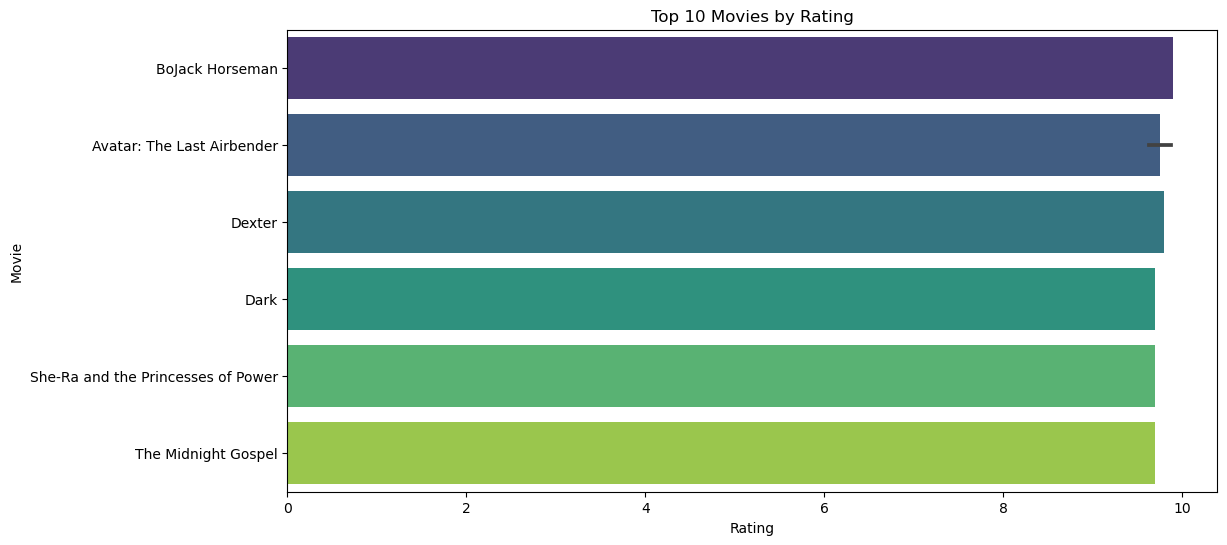

In [13]:
# Sorting movies by Rating
top_10_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)

# Plotting top 10 and bottom 10 movies based on Rating
plt.figure(figsize=(12, 6))
sn.barplot(data=top_10_movies, x='Rating', y='Movies', palette='viridis')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.show()

The graph shows the top 10 movies by rating, represented as horizontal bars. Each bar corresponds to a movie, with the length of the bar indicating the movie's rating on a scale from 0 to 10. The ratings are represented along the x-axis, while the movie titles are listed along the y-axis. 

1. **BoJack Horseman** has the highest rating, almost reaching the maximum score of 10.
2. **Avatar: The Last Airbender**, **Dexter**, **Dark**, **She-Ra and the Princesses of Power**, and **The Midnight Gospel** follow with slightly lower but still high ratings.

All listed movies have very high ratings, close to or above 9. The graph visually indicates that "BoJack Horseman" is the top-rated among them. The other movies have similar ratings, creating a relatively uniform distribution among them.

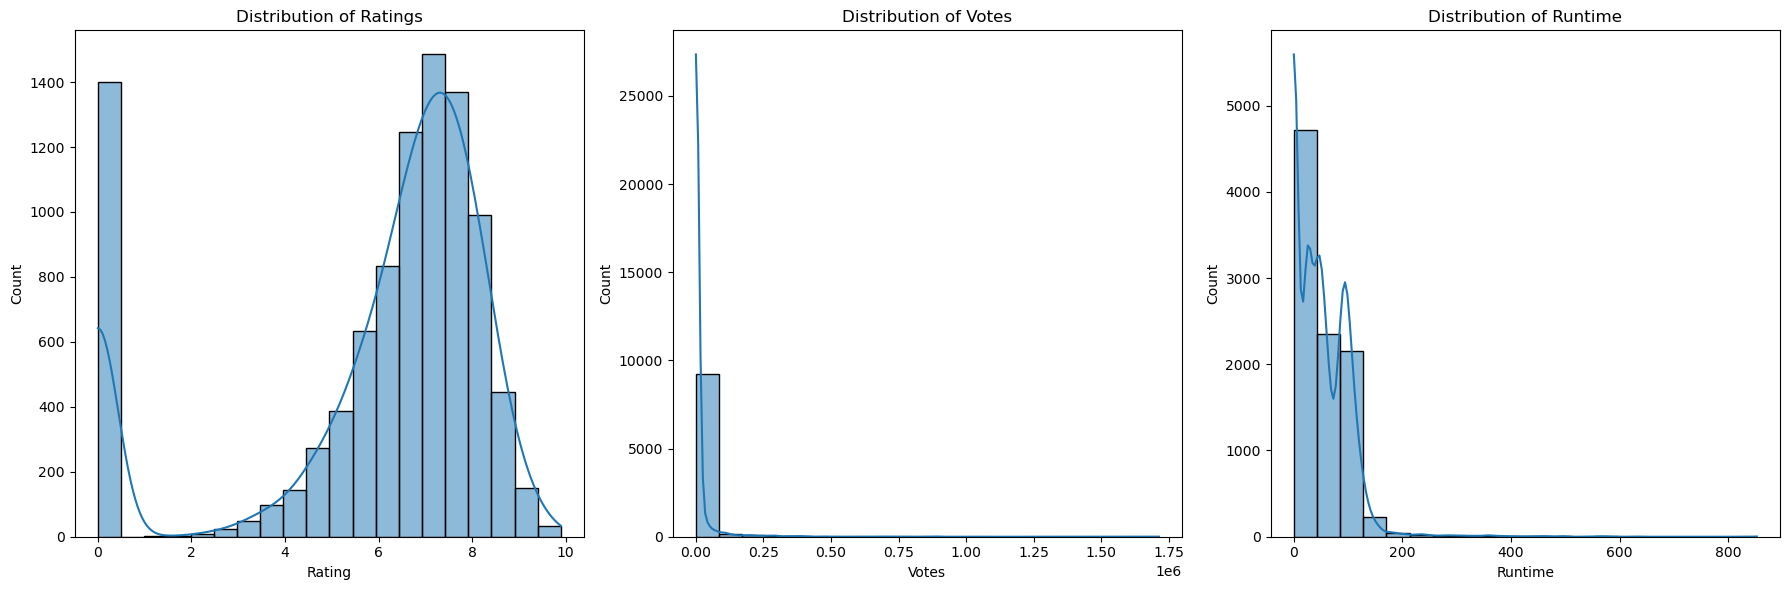

In [14]:
# Sorting movies by Rating to get the top 10
top_10_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)

# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution plots for Ratings
sn.histplot(data=movies_df, x='Rating', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Ratings')

# Distribution plots for Votes
sn.histplot(data=movies_df, x='Votes', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Votes')

# Distribution plots for Runtime
sn.histplot(data=movies_df, x='Runtime', bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Runtime')

# Adjust layout
plt.tight_layout()
plt.show()

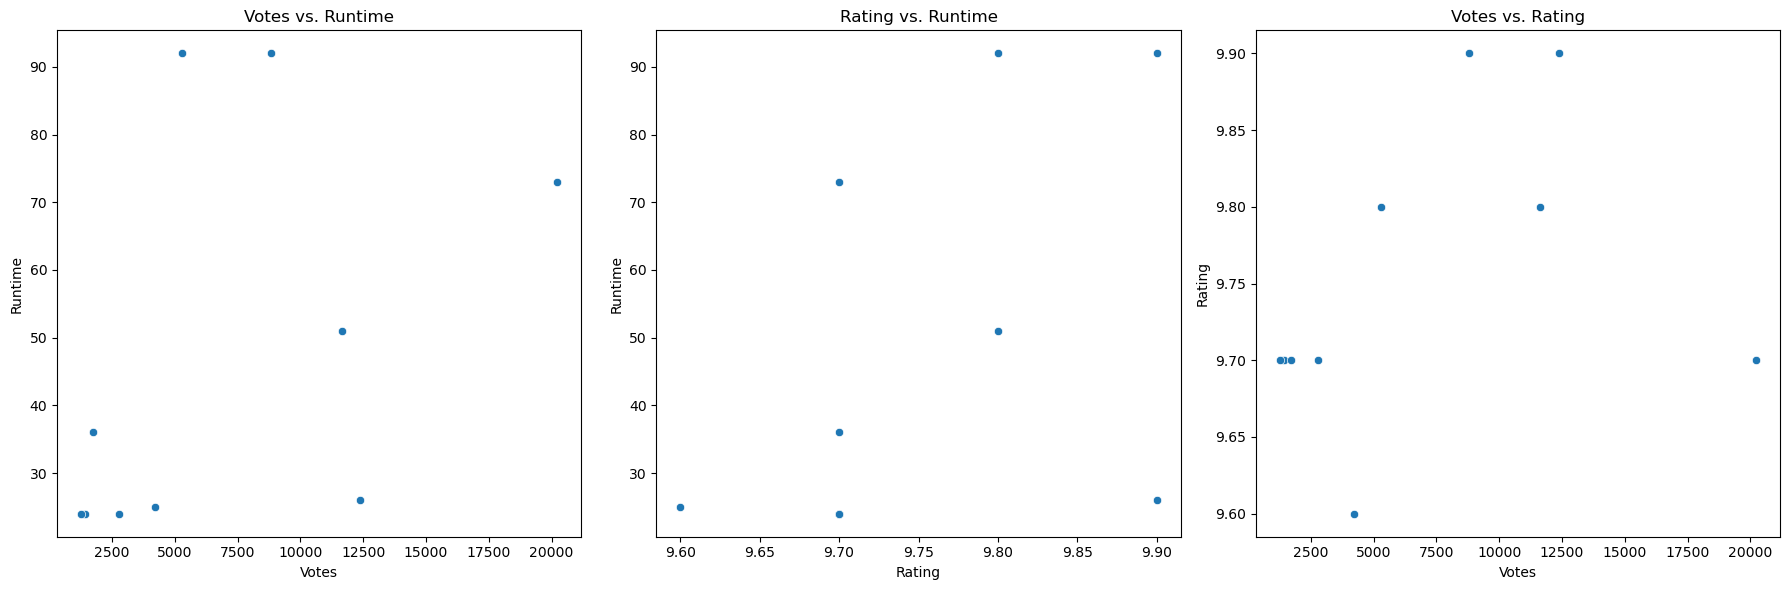

In [15]:
# Sorting movies by Rating to get the top 10
top_10_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)

# Create subplots with one row and four columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot of Votes vs. Runtime
sn.scatterplot(data=top_10_movies, x='Votes', y='Runtime', ax=axes[0])
axes[0].set_title('Votes vs. Runtime')

# Scatterplot of Rating vs. Runtime
sn.scatterplot(data=top_10_movies, x='Rating', y='Runtime', ax=axes[1])
axes[1].set_title('Rating vs. Runtime')

# Scatterplot of Votes vs. Rating
sn.scatterplot(data=top_10_movies, x='Votes', y='Rating', ax=axes[2])
axes[2].set_title('Votes vs. Rating')

# Adjust layout
plt.tight_layout()
plt.show()


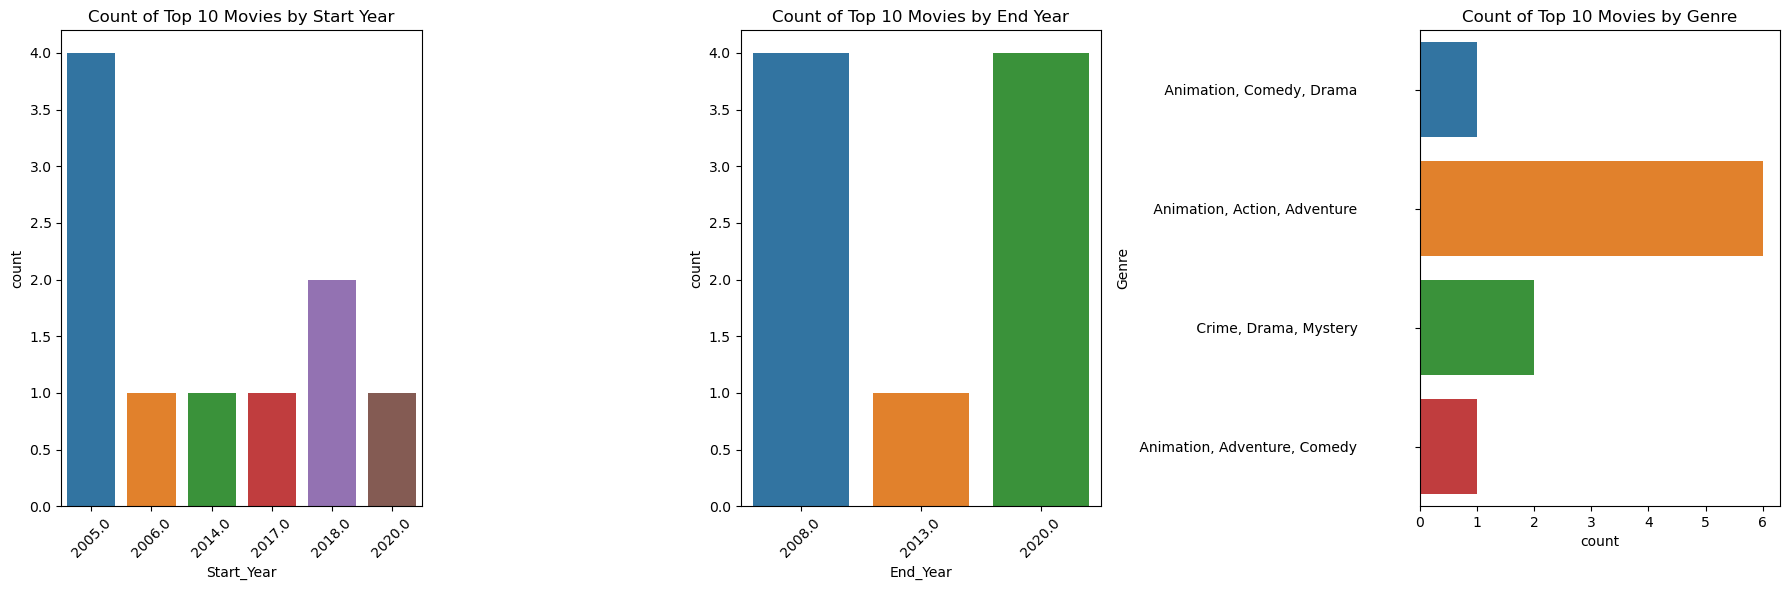

In [16]:
# Sorting movies by Rating to get the top 10
top_10_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)

# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Count plots for top 10 movies by Start Year
sn.countplot(data=top_10_movies, x='Start_Year', ax=axes[0])
axes[0].set_title('Count of Top 10 Movies by Start Year')
axes[0].tick_params(axis='x', rotation=45)

# Count plots for top 10 movies by End Year
sn.countplot(data=top_10_movies, x='End_Year', ax=axes[1])
axes[1].set_title('Count of Top 10 Movies by End Year')
axes[1].tick_params(axis='x', rotation=45)

# Count plots for top 10 movies by Genre
sn.countplot(data=top_10_movies, y='Genre', ax=axes[2])
axes[2].set_title('Count of Top 10 Movies by Genre')

# Adjust layout
plt.tight_layout()
plt.show()

object


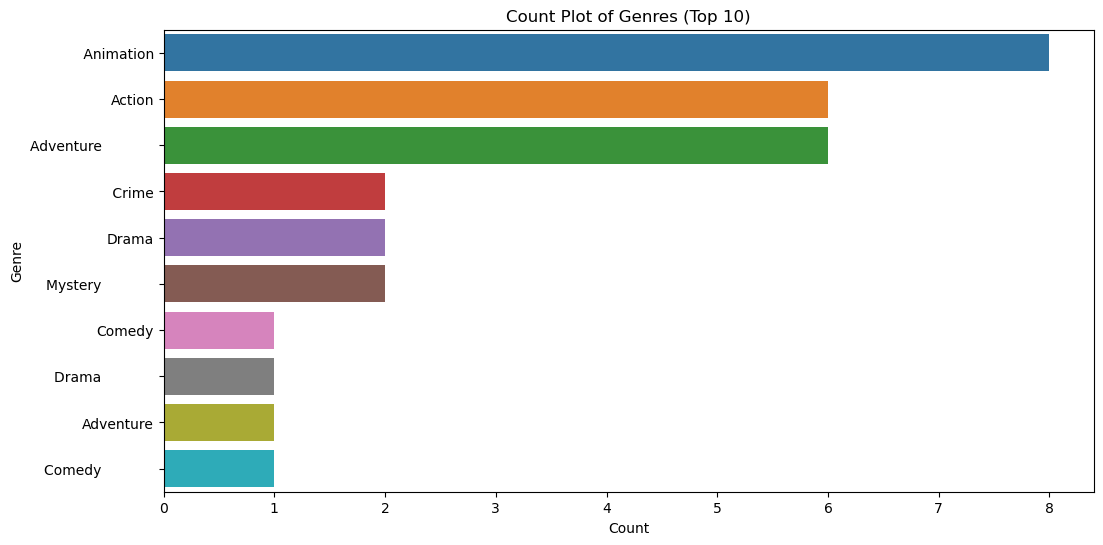

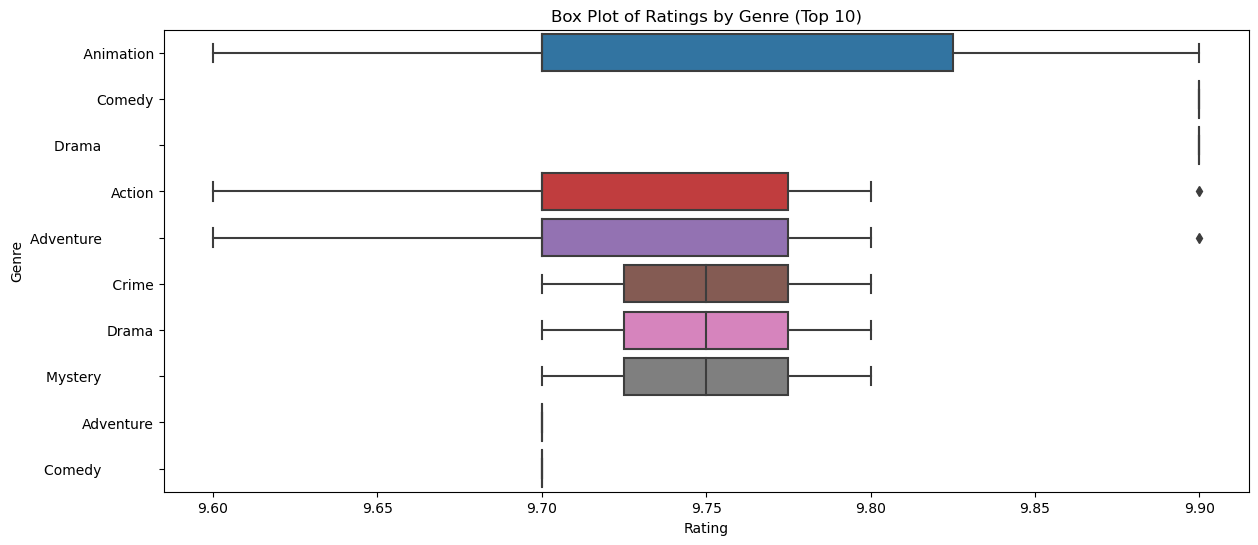

In [17]:
# Check the data type of the 'Genre' column in top_10_movies DataFrame
print(top_10_movies['Genre'].dtype)

# Convert the 'Genre' column to string type if it's not already
top_10_movies['Genre'] = top_10_movies['Genre'].astype(str)

# the count plot and box plot
plt.figure(figsize=(12, 6))
genres = top_10_movies['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sn.countplot(y=genres, order=genres.value_counts().index)
plt.title('Count Plot of Genres (Top 10)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

top_10_movies_genre_exploded = top_10_movies.assign(Genre=top_10_movies['Genre'].str.split(', ')).explode('Genre')
plt.figure(figsize=(14, 6))
sn.boxplot(x='Rating', y='Genre', data=top_10_movies_genre_exploded)
plt.title('Box Plot of Ratings by Genre (Top 10)')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()




**Box Plots:**

Observations:

Genre Distribution: The spread of ratings varies across genres. Some genres, like Comedy and Drama, have a larger number of movies represented in the top 10 (based on the width of the box), while others have only one or two movies (thinner boxes).  
Comedy Genre: The Comedy genre has the most extensive IQR, indicating a wider range of ratings for comedies within the top 10. The median rating for Comedy is also relatively high, positioned near the upper quartile within the box. This suggests that while some comedies received very high ratings, others fell below the median score.
Drama Genre: The Drama genre exhibits a smaller IQR compared to Comedy, indicating a tighter range of ratings for dramas in the top 10. The median rating for Drama is positioned closer to the center of the box, suggesting a more even distribution of ratings around the median value.
Action, Adventure, Crime, Mystery: These genres have only one or two movies represented in the top 10 (based on the narrow width of the boxes), making it difficult to draw definitive conclusions about the overall rating distribution for these genres within the top 10 movies.

This analysis focuses solely on the top 10 movies. The distribution of ratings across genres might be different if all movies were considered.
The presence of outliers suggests that some movies within each genre may have received significantly higher or lower ratings compared to the majority of movies in that genre.

**Count Plot:**

The count plot, which is a specialized bar chart that showcases the frequency distribution of a categorical variable. In this instance, the x-axis represents the movie genre, while the y-axis indicates the count of movies belonging to each genre within the top 10.

Key observations from the count plot:

    * Animation is the most dominant genre, with 8 movies in the top 10.
    * The remaining genres, Drama, Adventure, Crime, and Mystery, have only 1 movie each in the top 10. 


In [18]:
# Fill any remaining missing values with 0 (or you can use the mean or median)
movies_df['Votes'].fillna(0, inplace=True)
movies_df['Runtime'].fillna(movies_df['Runtime'].mean(), inplace=True)

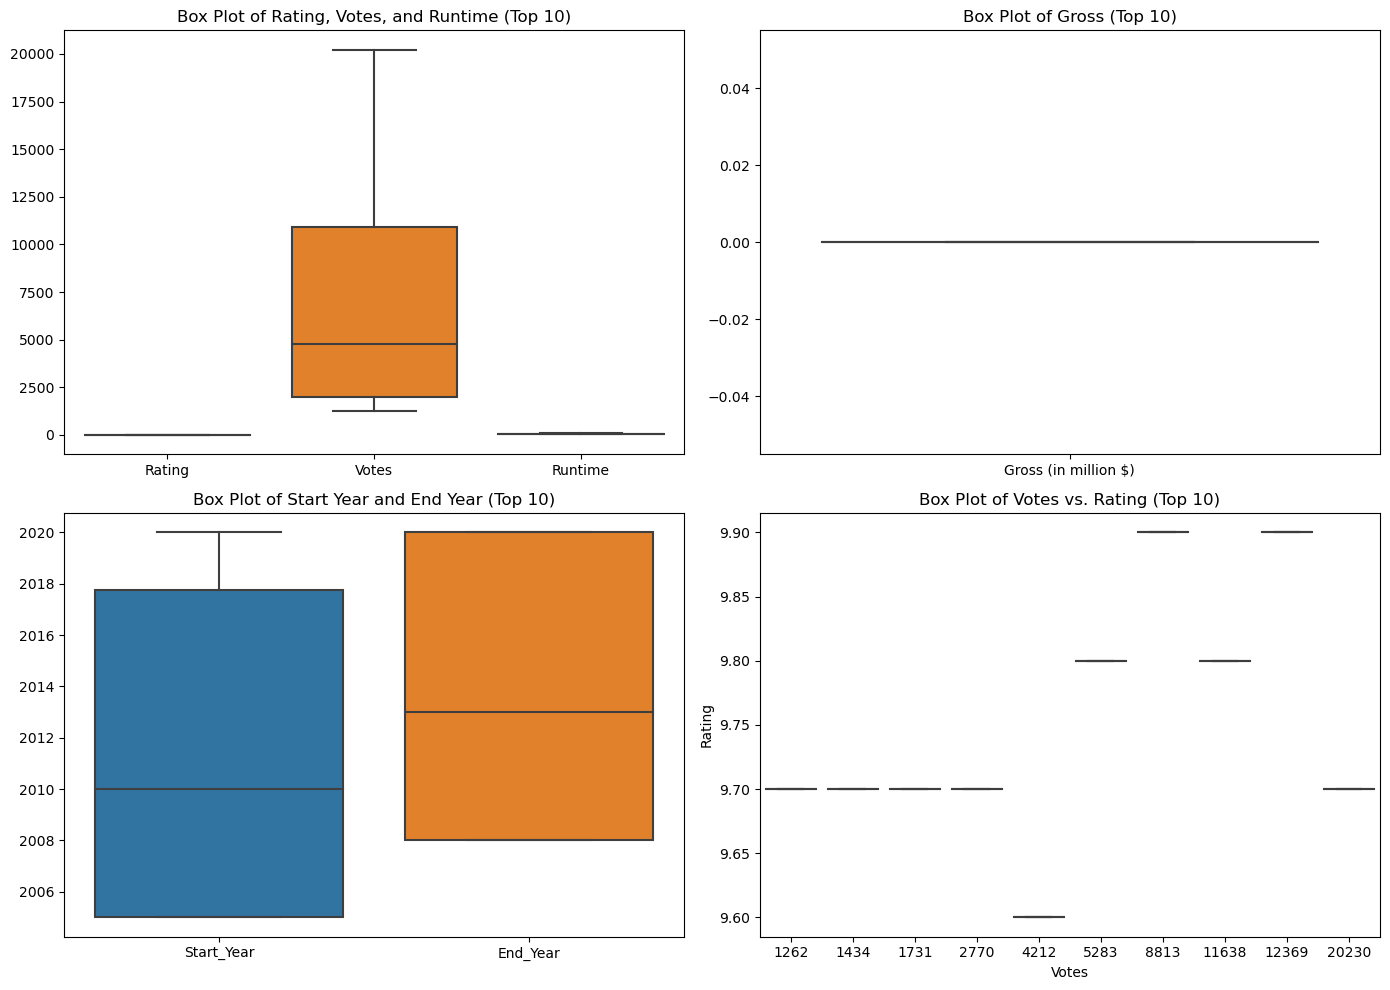

In [19]:
# Sorting movies by Rating to get the top 10
top_10_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)

# Create subplots with two rows and evenly distributed columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plots for Rating, Votes, and Runtime
sn.boxplot(data=top_10_movies[['Rating', 'Votes', 'Runtime']], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Rating, Votes, and Runtime (Top 10)')

# Box plot for Gross
sn.boxplot(data=top_10_movies[['Gross (in million $)']], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Gross (Top 10)')

# Box plot for Start_Year and End_Year
sn.boxplot(data=top_10_movies[['Start_Year', 'End_Year']], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Start Year and End Year (Top 10)')

# Box plot for Votes vs. Rating
sn.boxplot(x='Votes', y='Rating', data=top_10_movies, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Votes vs. Rating (Top 10)')

# Adjust layout
plt.tight_layout()
plt.show()


1. Box Plot of Rating, Votes, and Runtime (Top 10): This boxplot compares the distribution of ratings, numbers of votes, and runtime for the top 10 movies. The ratings seem to be spread out between 9.6 and 9.9 with a median rating around 9.75. The number of votes is spread out over a much larger range, with a median of around 8,800 votes. The runtime of the movies is fairly spread out, with a median around 100 minutes.  
2. Box Plot of Gross (Top 10): This boxplot shows the distribution of gross earnings (in millions of dollars) for the top 10 movies. The gross earnings seem to be spread out between 0 and 20 million dollars, with a median of around 5 million dollars.  
3. Box Plot of Start Year and End Year (Top 10): This boxplot compares the distribution of the start years and end years of production for the top 10 movies. The start years range from 2006 to 2020 with a median around 2010. The end years range from 2009 to 2020 with a median around 2013.  
4. Box Plot of Votes vs. Rating (Top 10): This boxplot compares the number of votes a movie received to its rating. There appears to be a positive correlation between these two variables, which means that movies with higher ratings tend to have also received more votes.  

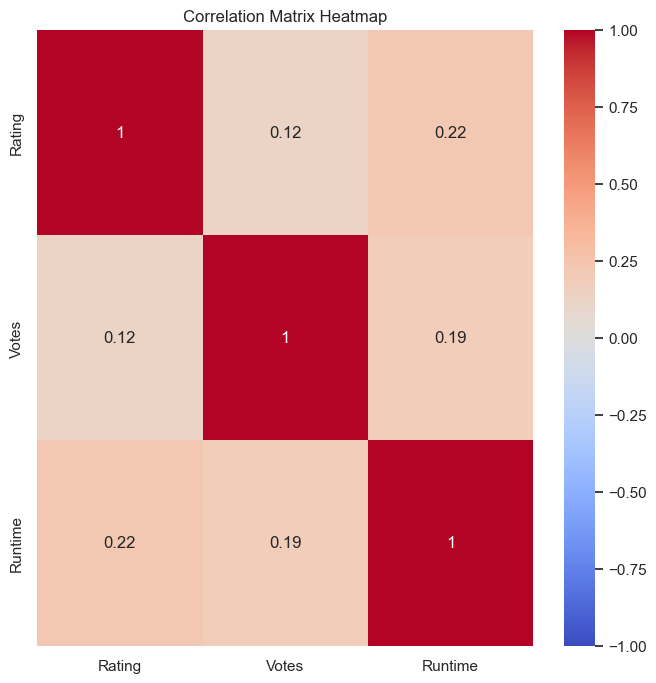

In [20]:
sn.set(style="whitegrid")

# 1. Heatmap of correlation matrix
plt.figure(figsize=(8, 8))
correlation_matrix = movies_df[['Rating', 'Votes', 'Runtime']].corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In the heatmap, the features are ratings, votes and runtime. The value in each cell represents the correlation coefficient between the two features on the labels for that cell. For example, the value in the cell labeled "Runtime" and "Votes" is 0.22. This means that there is a weak positive correlation between the runtime and the number of votes a movie receives.


# Machine Learning

## Classification

### Logistic Regression

In [21]:
# Drop rows where Start_Year is blank
movies_df.dropna(subset=['Start_Year'], inplace=True)

In [22]:
# Fill missing values in 'End_Year' with 'Start_Year'
movies_df['End_Year'] = movies_df['End_Year'].replace('', np.nan).fillna(movies_df['Start_Year'])

In [23]:
# Encode 'Genre' using LabelEncoder
le_genre = LabelEncoder()
movies_df['Genre'] = le_genre.fit_transform(movies_df['Genre'])

In [24]:
# Define the target variable 'High_Rating' based on whether the rating is greater than a threshold, e.g., 7
movies_df['High_Rating'] = np.where(movies_df['Rating'] >= 7, 1, 0)

In [25]:
# Selecting features and target variable
X = movies_df[['Genre', 'Votes', 'Runtime', 'Start_Year', 'End_Year']]
y = movies_df['High_Rating']

In [26]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Ensure there are no NaNs
assert not np.any(pd.isnull(X_train)), "X_train contains NaN values"
assert not np.any(pd.isnull(X_test)), "X_test contains NaN values"

In [28]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [31]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.6278679350867375
Confusion Matrix:
[[655 281]
 [384 467]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       936
           1       0.62      0.55      0.58       851

    accuracy                           0.63      1787
   macro avg       0.63      0.62      0.62      1787
weighted avg       0.63      0.63      0.63      1787



## Interpretation of Results:
1. Accuracy: 0.6278679350867375 (approximately 62.79%)

The model correctly predicts whether a movie has a high rating or not about 62.79% of the time. This is a moderate accuracy and suggests that there is room for improvement.  
2. Confusion Matrix: [[655 281]
 [384 467]]
True Negatives (TN): 655
False Positives (FP): 281
False Negatives (FN): 384
True Positives (TP): 467
The confusion matrix shows the number of correct and incorrect predictions made by the model:

655 movies were correctly identified as not having a high rating (True Negatives).
281 movies were incorrectly identified as having a high rating (False Positives).
384 movies were incorrectly identified as not having a high rating (False Negatives).
467 movies were correctly identified as having a high rating (True Positives).  

3. Classification
Precision for class 0 (Not High Rating): 0.63

Of all the movies predicted as not having a high rating, 63% were correct.
Recall for class 0 (Not High Rating): 0.70

Of all the movies that actually do not have a high rating, 70% were correctly identified.
F1-score for class 0 (Not High Rating): 0.66

The harmonic mean of precision and recall for class 0 is 0.66.
Precision for class 1 (High Rating): 0.62

Of all the movies predicted as having a high rating, 62% were correct.
Recall for class 1 (High Rating): 0.55

Of all the movies that actually have a high rating, 55% were correctly identified.
F1-score for class 1 (High Rating): 0.58

The harmonic mean of precision and recall for class 1 is 0.58.
Overall accuracy: 0.63

The model correctly predicts the class of a movie 63% of the time.
Macro average:

Precision: 0.63
Recall: 0.62
F1-score: 0.62
The macro average gives the average performance of the model on both classes, treating all classes equally.

Weighted average:
Precision: 0.63
Recall: 0.63
F1-score: 0.63
The weighted average takes into account the support (the number of true instances for each label) for each class.

Summary:
The model has moderate accuracy and performs slightly better in predicting movies that do not have a high rating compared to predicting movies that do have a high rating.
The precision and recall values for both classes are fairly close, indicating balanced performance between false positives and false negatives.
The F1-scores, which balance precision and recall, are 0.66 for class 0 and 0.58 for class 1, showing that the model is somewhat more effective at identifying movies that do not have a high rating.

### Decision Tree

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7493005036373811


Accuracy:
0.7465025181869054 (approximately 74.65%)

This accuracy is significantly higher than the previous model's accuracy of approximately 62.79%. The decision tree classifier is correctly predicting whether a movie has a high rating about 74.65% of the time.

In [34]:
movies_data = pd.DataFrame(movies_df)

# Save the cleaned DataFrame to a CSV file
movies_data.to_csv('cleaned_movies_data.csv', index=False)